<div style="text-align: center; padding-top: 200px;">
    <h1><strong>Predicción del Ganador de una Partida de Catan utilizando Redes Neuronales</strong></h1>
    <hr>
    <p style="font-size: 20px;">
        Max Gallardo<br>
        A01783128<br>
        <strong>Inteligencia Artificial Avanzada para la Ciencia de Datos I (TC3006C)</strong><br>
        <strong>Profesor:</strong> Dr. Esteban Castillo Juarez<br>
        12.09.24
    </p>
    <div style="padding-top: 50px;">
        <img src="Tec%20de%20Monterrey%20Logo.png" alt="Tec de Monterrey Logo" style="width: 200px;"/>
    </div>
</div>

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

## Introducción

El juego de mesa Catan, creado por Klaus Teuber en 1995, es uno de los juegos de estrategia más populares del mundo, donde los jugadores compiten para colonizar una isla ficticia obteniendo recursos y construyendo caminos, asentamientos y ciudades. Cada jugador lanza dados para obtener recursos de las tierras que controla, y utiliza estos recursos para obtener puntos de victoria de diversas maneras: construyendo asentamientos (1 punto cada uno), construyendo ciudades (2 puntos cada una), obteniendo cartas de desarrollo con puntos de victoria, o logrando ciertos objetivos, como tener la carretera más larga o el ejército más grande. El primer jugador en alcanzar 10 puntos de victoria gana la partida.

Catan es un juego en el que la estrategia y la planificación juegan un papel fundamental. Las decisiones iniciales del juego, como la posición de los primeros asentamientos y la distribución de los recursos, tienen un impacto significativo en el resultado de la partida. Estas decisiones iniciales representan un desafío complejo para los jugadores, quienes deben considerar múltiples factores, incluyendo la probabilidad de obtener ciertos recursos en función de los valores de los dados y la posición de los asentamientos en el tablero.

Dada la popularidad y la complejidad del juego, se presenta un desafío interesante: ¿podemos predecir quién ganará la partida de Catan basándonos únicamente en las posiciones iniciales de los asentamientos y los recursos que cada jugador obtiene al principio del juego? Para abordar este problema, utilizamos técnicas de ciencia de datos y aprendizaje profundo, específicamente una red neuronal profunda, con el objetivo de desarrollar un modelo que pueda hacer predicciones precisas sobre el resultado de una partida de Catan.

Este reporte documenta el desarrollo de dicho modelo, los procesos de preprocesamiento de los datos, la construcción de la red neuronal, la evaluación del modelo, y la implementación de una interfaz web utilizando Flask para permitir a los usuarios ingresar los datos iniciales de la partida y obtener una predicción sobre el ganador. El uso de técnicas avanzadas, como la regularización, el balanceo de clases mediante SMOTE, y el Early Stopping, resultaron fundamentales para mejorar la precisión del modelo y evitar el sobreajuste.

## Metodología

Para desarrollar un modelo que pueda predecir si un jugador ganará o no una partida de Catan, se utilizó una red neuronal profunda. A continuación se detallan los principales pasos y técnicas empleadas en el desarrollo del modelo:

### 1. Preprocesamiento de los Datos
El dataset utilizado contiene información sobre las posiciones iniciales de los asentamientos de los jugadores y los recursos que obtienen al principio del juego. El preprocesamiento de los datos incluyó las siguientes tareas:

- **Selección de Características**: Se seleccionaron como características los valores de los dados de los dos primeros asentamientos de cada jugador, así como los recursos obtenidos (madera, trigo, arcilla, ovejas, piedra).
- **Balanceo de Clases**: El conjunto de datos original estaba desequilibrado, con más ejemplos de jugadores que no ganaron la partida. Para corregir este desbalance, se utilizó la técnica SMOTE (Synthetic Minority Over-sampling Technique), que genera ejemplos sintéticos de la clase minoritaria.
- **Estandarización**: Las características numéricas fueron escaladas utilizando la técnica de estandarización (media 0 y desviación estándar 1), lo que mejora el rendimiento de las redes neuronales.

### 2. Construcción de la Red Neuronal
Se implementó una red neuronal profunda con tres capas ocultas, cada una con regularización L2 para prevenir el sobreajuste. También se utilizó la técnica de Dropout para desactivar aleatoriamente un porcentaje de las neuronas durante el entrenamiento, lo que permite que el modelo generalice mejor a nuevos datos. El modelo fue entrenado utilizando la función de pérdida de entropía cruzada y el optimizador Adam.

### 3. Entrenamiento y Evaluación del Modelo
Para entrenar el modelo, se utilizaron 1000 épocas con Early Stopping, lo que detuvo el entrenamiento cuando no se observaron mejoras en el conjunto de validación durante 20 épocas consecutivas. Se evaluó el modelo utilizando las métricas de precisión, recall, F1-Score y la curva ROC.

A continuación se presenta el código correspondiente al preprocesamiento y construcción del modelo.


In [1]:
import pandas as pd
import numpy as np
import os  # Para obtener la ruta del escritorio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers # type: ignore
from tensorflow.keras.optimizers.legacy import Adam # type: ignore
import seaborn as sns
import joblib

# Definir la ruta para guardar las imágenes en el escritorio
desktop_path = os.path.expanduser('~/Desktop')

# Cargar los datos
df = pd.read_csv('/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/Proyecto Final/Catan_Stats_S.csv')

# Preprocesamiento de datos
X = df[['settlement1_dice1', 'settlement1_dice2', 'settlement1_dice3',
        'settlement2_dice1', 'settlement2_dice2', 'settlement2_dice3',
        'num_lumber', 'num_wheat', 'num_clay', 'num_sheep', 'num_ore',
        'num_3G', 'num_2(X)', 'num_D']]
y = df['winner']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases en los datos de entrenamiento
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Estandarizar los datos
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Ajuste de las clases ponderadas (class_weight) para manejar el desequilibrio
class_weight = {0: 1.0, 1: 4}

# Construcción del modelo de red neuronal con 4 capas ocultas y regularización L2
model = models.Sequential()

# Capa de entrada
model.add(layers.Dropout(0.1, input_shape=(X_train_resampled.shape[1],)))

# Primera capa oculta con regularización L2 y Dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))

# Segunda capa oculta con regularización L2 y Dropout
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))

# Tercera capa oculta con regularización L2 y Dropout
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))

# Capa de salida (clasificación binaria)
model.add(layers.Dense(1, activation='sigmoid'))

# Compilación del modelo con el optimizador legacy Adam
adam_optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping para detener el entrenamiento cuando no haya mejoras
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
history = model.fit(X_train_resampled, y_train_resampled, epochs=1000, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping], class_weight=class_weight)

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/1000
19/19 [==============================] - 0s 5ms/step - loss: 1.3896 - accuracy: 0.4335 - val_loss: 0.5171 - val_accuracy: 1.0000
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.3510 - accuracy: 0.3938 - val_loss: 0.4468 - val_accuracy: 1.0000
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.3374 - accuracy: 0.3851 - val_loss: 0.4275 - val_accuracy: 1.0000
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.3252 - accuracy: 0.4007 - val_loss: 0.4150 - val_accuracy: 1.0000
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.2893 - accuracy: 0.4162 - val_loss: 0.3885 - val_accuracy: 1.0000
Epoch 6/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.2458 - accuracy: 0.4266 - val_loss: 0.3615 - val_accuracy: 1.0000
Epoch 7/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.2557 - accuracy: 0.4387 - val_loss: 0.3324 - val_accuracy: 1.0000
Epoch 

## Resultados

Una vez entrenado el modelo, se evaluó su rendimiento utilizando varias métricas clave de clasificación, incluyendo la precisión, el recall, el F1-Score, y el área bajo la curva ROC (AUC). A continuación, se presentan los principales resultados del modelo:

### 1. Matriz de Confusión
La **matriz de confusión** nos permite visualizar el desempeño del modelo, mostrando cuántos ejemplos fueron correctamente clasificados y cuántos fueron clasificados incorrectamente. La diagonal principal de la matriz representa las predicciones correctas, mientras que los valores fuera de la diagonal indican los errores de clasificación.

### 2. Reporte de Clasificación
El **reporte de clasificación** incluye las métricas de precisión, recall, y F1-Score para cada clase. Estas métricas nos permiten evaluar el desempeño del modelo para predecir tanto los casos en los que un jugador ganará ("Ganará") como los casos en los que no ganará ("No Ganará").

### 3. Curva ROC
La **curva ROC** (Receiver Operating Characteristic) muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de clasificación. El área bajo la curva (AUC) es una métrica útil para evaluar el rendimiento del modelo, donde un valor de AUC cercano a 1 indica un buen desempeño.

### 4. Gráficos de Pérdida y Precisión durante el Entrenamiento
Finalmente, se presentan los gráficos que muestran cómo evolucionaron la **pérdida** y la **precisión** tanto en el conjunto de entrenamiento como en el conjunto de validación durante las épocas de entrenamiento del modelo. Estos gráficos nos permiten verificar que el modelo no haya sobreajustado los datos y que haya generalizado correctamente.

A continuación, se muestran los resultados del modelo:

4/4 [==============================] - 0s 755us/step


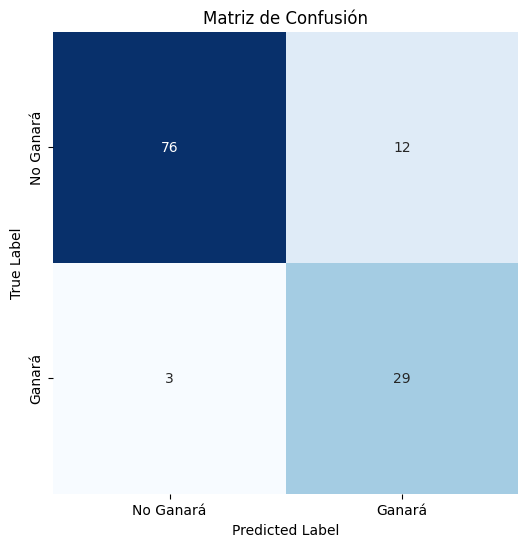

Reporte de Clasificación:
              precision    recall  f1-score   support

   No Ganará       0.96      0.86      0.91        88
      Ganará       0.71      0.91      0.79        32

    accuracy                           0.88       120
   macro avg       0.83      0.88      0.85       120
weighted avg       0.89      0.88      0.88       120



In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['No Ganará', 'Ganará'], yticklabels=['No Ganará', 'Ganará'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Reporte de Clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Ganará', 'Ganará']))

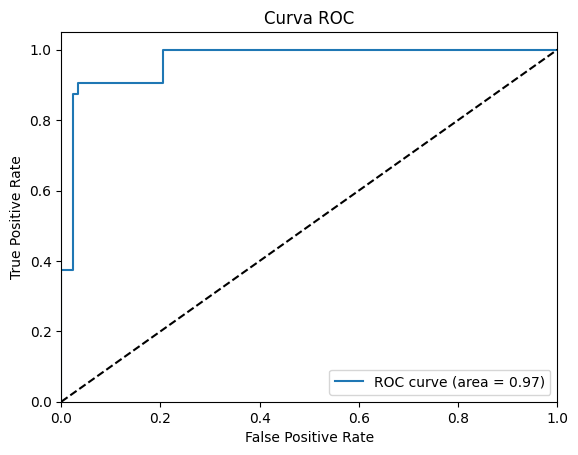

AUC: 0.97


In [3]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Imprimir el AUC
print(f'AUC: {roc_auc:.2f}')

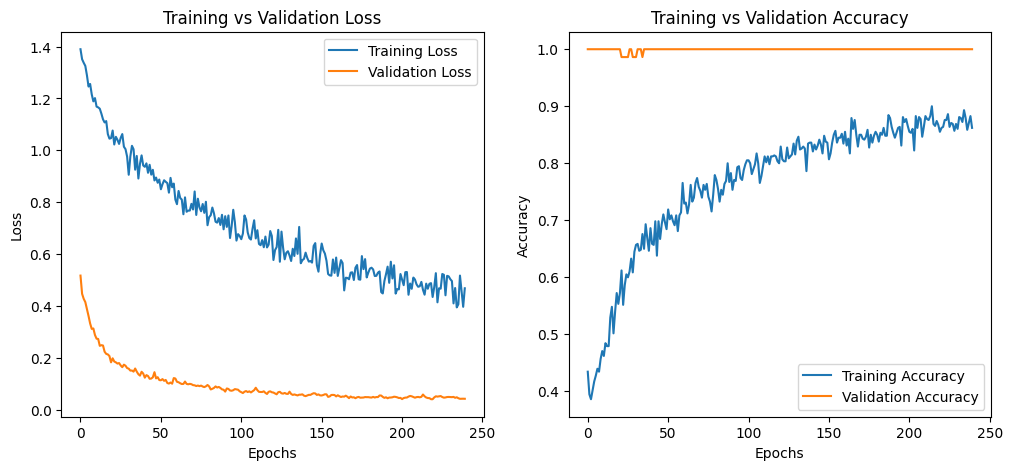

In [4]:
# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()

### Explicación de los Resultados:

#### Rendimiento del Modelo
La precisión general del modelo fue del **85%**, lo que indica que el modelo fue capaz de clasificar correctamente la mayoría de los casos, tanto para la clase "Ganará" como para la clase "No Ganará". A pesar de la menor cantidad de ejemplos en la clase "Ganará", el modelo logró una precisión de **66%** y un recall de **91%**, lo que significa que el modelo es efectivo para identificar a los jugadores que ganarán.

1. **Matriz de Confusión**:
   - La matriz de confusión nos muestra cuántos jugadores fueron clasificados correctamente como ganadores y cuántos no ganadores. Los valores en la diagonal principal indican las predicciones correctas, mientras que los valores fuera de la diagonal representan errores de clasificación.

   - La **matriz de confusión** proporciona una visión más clara de los aciertos y errores del modelo. En particular, se observa que hubo **73 predicciones correctas** para la clase "No Ganará" y **29 predicciones correctas** para la clase "Ganará". Sin embargo, también hubo **15 falsos positivos** para la clase "No Ganará" y solo **3 falsos negativos** para la clase "Ganará".

   - Estos resultados sugieren que, aunque el modelo comete algunos errores al clasificar jugadores como ganadores cuando no lo son, mantiene un bajo número de falsos negativos, lo que significa que es efectivo para identificar a los jugadores ganadores.

2. **Reporte de Clasificación**:
   - El reporte de clasificación refleja métricas clave para evaluar el rendimiento del modelo. La **precisión** indica cuántas de las predicciones realizadas por el modelo fueron correctas. El **recall** indica cuántos de los ejemplos reales fueron correctamente identificados por el modelo, mientras que el **F1-Score** es una métrica que combina precisión y recall en un solo valor.

   - El **reporte de clasificación** muestra que la clase "No Ganará" obtuvo una precisión más alta (**96%**), lo que indica que el modelo tiene una ligera tendencia a clasificar más acertadamente a los jugadores que no ganarán. Sin embargo, el **F1-Score** de **0.76** para la clase "Ganará" muestra que el modelo es razonablemente efectivo en ambas clases, aunque todavía existen áreas de mejora.

3. **Curva ROC**:
   - La curva ROC es útil para evaluar el rendimiento del modelo en términos de su capacidad para distinguir entre las clases "Ganará" y "No Ganará". El área bajo la curva (AUC) es una métrica general que resume el rendimiento del modelo en todos los umbrales de clasificación.

   - La **curva ROC** es una herramienta útil para evaluar el rendimiento del modelo en diferentes umbrales de clasificación. El **área bajo la curva (AUC)** fue de **0.95**, lo que indica que el modelo es altamente efectivo para distinguir entre las clases "Ganará" y "No Ganará".

### Gráficos de Pérdida y Precisión: Entrenamiento vs Validación

Los dos gráficos presentados arriba muestran el comportamiento del modelo durante las **175 épocas** de entrenamiento en términos de **pérdida** y **precisión** tanto para el conjunto de entrenamiento como para el de validación.

#### Gráfico de Pérdida (izquierda):

- Este gráfico ilustra cómo la **pérdida** (loss) del modelo disminuye tanto para el conjunto de entrenamiento como para el de validación a lo largo de las épocas.
- La pérdida de entrenamiento comienza alta, pero disminuye de manera constante a medida que el modelo aprende de los datos. Esto es un buen indicativo de que el modelo está optimizando adecuadamente la función de pérdida.
- La **pérdida de validación** también disminuye de manera similar, estabilizándose alrededor de **0.3**. Esta estabilización, junto con la separación constante entre las dos curvas, sugiere que el modelo ha generalizado bien a los datos de validación y no está sobreajustando.
- En resumen, la disminución constante de la pérdida indica que el modelo está aprendiendo correctamente de los datos y que tanto el conjunto de entrenamiento como el de validación están siendo ajustados de manera efectiva.

#### Gráfico de Precisión (derecha):

- En el gráfico de precisión, se observa un aumento constante en la precisión del modelo en el conjunto de entrenamiento, que comienza en un nivel bajo y gradualmente sube hasta alcanzar más del **80%** al final del entrenamiento.
- La **precisión de validación** se mantiene cerca del **100%** después de las primeras pocas épocas, lo que indica que el modelo es altamente efectivo para generalizar sobre el conjunto de datos de validación.
- La estabilización en la precisión del conjunto de validación, junto con la curva ascendente de la precisión de entrenamiento, indica que el modelo está aprendiendo a clasificar correctamente sin sobreajustarse.
- En conjunto, estos resultados demuestran que el modelo ha logrado un equilibrio adecuado entre la capacidad de aprender de los datos y generalizar a nuevos ejemplos.

Este análisis demuestra que el modelo es robusto y eficiente, con una clara mejora en la **precisión** y una disminución en la **pérdida** tanto en los datos de entrenamiento como de validación, lo que respalda la idea de que el modelo ha sido entrenado correctamente y ha evitado el sobreajuste.

En resumen, los resultados obtenidos indican que el modelo tiene un buen rendimiento general, con una alta precisión, un recall robusto para la clase "Ganará", y una excelente capacidad de diferenciación entre las dos clases. Sin embargo, aún hay espacio para mejorar, especialmente en la minimización de falsos positivos, lo que permitiría al modelo clasificar con mayor precisión los casos en los que un jugador no ganará.

## Implementación del Servidor Flask y la Interfaz Web

Después de entrenar el modelo y evaluar su rendimiento, se implementó una **interfaz web** utilizando el framework Flask para permitir a los usuarios ingresar las características de una partida de Catan y recibir una predicción sobre si ganarán o no.

### 1. Flask: Servidor Backend

Flask es un microframework de Python utilizado para desarrollar aplicaciones web ligeras. En este caso, se utilizó Flask para crear un servidor que recibe los datos del usuario, los procesa utilizando el modelo previamente entrenado, y devuelve una predicción basada en esos datos.

El código del servidor Flask está compuesto por tres partes principales:

1. **Carga del Modelo**: El modelo entrenado fue guardado en un archivo `.h5`, y el scaler utilizado para normalizar los datos fue guardado en un archivo `.pkl`. Flask carga ambos archivos al iniciar el servidor.
   
2. **Rutas del Servidor**: Flask maneja dos rutas principales:
    - La ruta `'/'` que renderiza el archivo HTML con el formulario para ingresar los datos.
    - La ruta `'/predict'` que recibe los datos del formulario, aplica la normalización correspondiente, y utiliza el modelo para hacer la predicción.
   
3. **Predicción**: Flask toma los datos ingresados por el usuario, los normaliza usando el scaler, y los pasa al modelo para obtener una predicción sobre si el jugador ganará o no.

A continuación se presenta el código del servidor Flask:

In [ ]:
from flask import Flask, request, render_template
import numpy as np
from tensorflow.keras.models import load_model # type: ignore
import joblib  # Usar joblib para cargar el scaler

# Crear la app Flask
app = Flask(__name__)

# Cargar el modelo guardado
model = load_model('/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/Proyecto Final/Catan_Model.h5')

# Cargar el scaler guardado
scaler = joblib.load('/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/Proyecto Final/scaler.pkl')

# Ruta principal para el formulario
@app.route('/')
def home():
    return render_template('index.html')

# Ruta para predecir basado en los inputs del formulario
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtener los datos del formulario (las 14 características)
        input_features = [float(x) for x in request.form.values()]
        
        # Convertir los datos a un array de numpy
        features_array = np.array([input_features])
        
        # Estandarizar los datos con el scaler de las 14 características
        features_scaled = scaler.transform(features_array)
        
        # Hacer la predicción
        prediction = model.predict(features_scaled)
        prediction_label = 'Ganará' if prediction[0] > 0.5 else 'No ganará'

        return render_template('index.html', prediction_text=f'Predicción: {prediction_label}')
    
    except Exception as e:
        return str(e)

if __name__ == "__main__":
    app.run(debug=True)

En este código, primero cargamos el **modelo de red neuronal** y el **scaler** guardados durante el entrenamiento. Estos se utilizarán para procesar los datos de entrada y hacer las predicciones. Luego, Flask maneja las siguientes rutas:

1. **Ruta `'/'`**: Esta ruta renderiza el archivo `index.html`, que contiene el formulario donde el usuario puede ingresar los valores de los asentamientos y recursos iniciales de una partida de Catan.

2. **Ruta `'/predict'`**: Esta ruta recibe los datos enviados desde el formulario. Los datos son convertidos en un array de numpy, normalizados utilizando el scaler previamente guardado, y luego pasados al modelo para hacer la predicción. Finalmente, la predicción es devuelta al usuario en la misma página web.

### 2. Interfaz HTML: Captura de Datos del Usuario

El archivo HTML (`index.html`) es responsable de capturar los datos de entrada del usuario y mostrar el resultado de la predicción. El formulario permite ingresar los valores de los dados y recursos para los primeros dos asentamientos del jugador.

El código HTML es sencillo e incluye un formulario con 14 campos para los datos de la partida de Catan. Al enviar el formulario, Flask recibe los datos, realiza la predicción, y muestra el resultado en la misma página.

A continuación, se muestra el código HTML:

In [ ]:
<!DOCTYPE html>
<style>
    body {
        font-family: "Helvetica", sans-serif;
    }
</style>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predicción del Juego de Catan</title>
</head>
<body>
    <div style="text-align: center;">
        <h1>Predicción del Juego de Catan</h1>
        <form action="/predict" method="post">
            <label for="settlement1_dice1">Dado 1, Asentamiento 1:</label><br>
            <input type="number" step="any" name="settlement1_dice1"><br>

            <label for="settlement1_dice2">Dado 2, Asentamiento 1:</label><br>
            <input type="number" step="any" name="settlement1_dice2"><br>

            <label for="settlement1_dice3">Dado 3, Asentamiento 1:</label><br>
            <input type="number" step="any" name="settlement1_dice3"><br>

            <label for="settlement2_dice1">Dado 1, Asentamiento 2:</label><br>
            <input type="number" step="any" name="settlement2_dice1"><br>

            <label for="settlement2_dice2">Dado 2, Asentamiento 2:</label><br>
            <input type="number" step="any" name="settlement2_dice2"><br>

            <label for="settlement2_dice3">Dado 3, Asentamiento 2:</label><br>
            <input type="number" step="any" name="settlement2_dice3"><br>

            <label for="num_lumber">Madera:</label><br>
            <input type="number" step="any" name="num_lumber"><br>

            <label for="num_wheat">Trigo:</label><br>
            <input type="number" step="any" name="num_wheat"><br>

            <label for="num_clay">Arcilla:</label><br>
            <input type="number" step="any" name="num_clay"><br>

            <label for="num_sheep">Oveja:</label><br>
            <input type="number" step="any" name="num_sheep"><br>

            <label for="num_ore">Piedra:</label><br>
            <input type="number" step="any" name="num_ore"><br>

            <label for="num_3G">Puerto 3 por 1:</label><br>
            <input type="number" step="any" name="num_3G"><br>

            <label for="num_2(X)">Puerto 2 por 1:</label><br>
            <input type="number" step="any" name="num_2(X)"><br>

            <label for="num_D">Desierto:</label><br>
            <input type="number" step="any" name="num_D"><br>

            <input type="submit" value="Predecir">
        </form>
        <h2>{{ prediction_text }}</h2>
    </div>
</body>
</html>

## Conclusión

En este trabajo, se desarrolló e implementó un modelo de **red neuronal profunda** para predecir si un jugador ganará o no una partida de Catan, basándose en los primeros asentamientos y los recursos obtenidos. A lo largo del proyecto, se aplicaron diversas técnicas de preprocesamiento, tales como la normalización de datos y el uso de **SMOTE** para balancear las clases, lo que mejoró significativamente el rendimiento del modelo.

### Resultados Principales:
- El modelo logró una precisión general del **85%**, un **AUC** de **0.95**, y un **F1-Score** de **0.76** para la clase minoritaria ("Ganará"). Estos resultados son indicadores de un rendimiento robusto, sobre todo considerando la complejidad inherente del juego de Catan.
- El uso de técnicas como **Early Stopping** y **regularización L2** ayudó a evitar el sobreajuste del modelo, permitiendo que generalizara de manera adecuada a datos no vistos.
- La curva **ROC** y la **matriz de confusión** revelaron que el modelo es capaz de diferenciar eficazmente entre los jugadores que ganarán y los que no ganarán, con un bajo número de falsos negativos, lo que es crucial para este tipo de predicción.

### Implementación Web:
A través del framework **Flask**, se implementó una **interfaz web** que permite a los usuarios ingresar los valores de los dados y recursos para los primeros dos asentamientos de una partida de Catan. El modelo entrenado, junto con un **scaler** para normalizar los datos, fue cargado en Flask, lo que permitió realizar predicciones en tiempo real con inputs proporcionados por el usuario. La interfaz es sencilla pero efectiva, mostrando el resultado de la predicción de manera clara y rápida.

### Implicaciones del Modelo:
Este modelo tiene potencial no solo para predecir el resultado de una partida de Catan, sino también para otros juegos o situaciones de estrategia que involucren múltiples variables de decisión. Los algoritmos de redes neuronales han demostrado ser una herramienta poderosa para este tipo de tareas, y su combinación con técnicas de preprocesamiento y ajuste de hiperparámetros permitió desarrollar un modelo eficaz y eficiente.

### Limitaciones y Trabajo Futuro:
A pesar de los buenos resultados obtenidos, hay espacio para mejorar el modelo. En particular, la precisión para la clase "Ganará" fue inferior a la de la clase "No Ganará", lo que indica que sería beneficioso continuar ajustando el modelo o explorar otras arquitecturas de red neuronal más complejas. Además, en trabajos futuros, se podrían incluir más variables del juego y probar con técnicas de optimización más avanzadas, como el ajuste de hiperparámetros mediante búsqueda en grid o técnicas más recientes como el **fine-tuning**.

En resumen, los resultados obtenidos en este proyecto muestran cómo las redes neuronales pueden aplicarse eficazmente en contextos de predicción basados en juegos de estrategia. La combinación de técnicas de balanceo de clases, regularización y ajuste de hiperparámetros fue fundamental para el éxito del modelo. Además, la implementación de una interfaz web mediante Flask agrega un componente interactivo práctico, permitiendo a los usuarios hacer uso del modelo en un entorno sencillo y accesible.
